# Credit risk project 
<img src="imgs/credit_risk.jpg" width="400" height="300">

The data set can be found here: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data.


About Dataset

Detailed data description of Credit Risk dataset:

| Feature Name | Description |
---------------|---------------
| person_age | Age|
person_gender |	 Gender 
person_education |	Education
person_income |	Annual Income
person_emp_exp |	Employment length (in years)
person_home_ownership |	Home ownership
loan_amnt |	Loan amount
loan_intent |	purpose of the loan
loan_percent_income |	Percent income
cb_person_cred_hist_length |	Credit history length
credit_score |	credit score
cb_person_default_on_file |	Historical default
loan_status |	Loan status (0 is non-default, 1 is default)

### Packages and libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier

In [2]:
credit_risk_df = pd.read_csv('loan_data.csv') 
credit_risk_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Data inspection and Exploratory data analysis

In [3]:
credit_risk_df.shape

(45000, 14)

In [4]:
credit_risk_df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [5]:
credit_risk_df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

None of the columns have missing values, which is a good fact

In [6]:
credit_risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


There are noticeable outliers in the age variable, with a maximum recorded age of 144.

In [7]:
credit_risk_df.duplicated().sum()

0

There are no duplicates in the dataset

In [8]:
display(credit_risk_df['person_education'].unique(), credit_risk_df['person_home_ownership'].unique(),
        credit_risk_df['loan_intent'].unique())

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

pd.get_dummies is used to convert categorical variables into one-hot encoded variables, which are also known as dummy variables. One-hot encoding is a technique to represent categorical variables in a numerical format, which is required by many machine learning algorithms.

In [9]:
credit_risk_df_dummies = pd.get_dummies(credit_risk_df, drop_first=True)
credit_risk_df_dummies.columns = [col.replace(" ", "_") for col in credit_risk_df_dummies.columns]
credit_risk_df_dummies = credit_risk_df_dummies.astype(int)
credit_risk_df_dummies.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21,12282,0,1000,11,0,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25,12438,3,5500,12,0,3,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23,79753,0,35000,15,0,2,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24,66135,1,35000,14,0,4,586,1,1,...,1,0,0,1,0,0,1,0,0,0


In [10]:
credit_risk_df_dummies.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High_School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')

In [11]:
null_columns = credit_risk_df_dummies.columns[credit_risk_df_dummies.isnull().any()]
print(null_columns)

Index([], dtype='object')


### Splitting the dataset 

In [12]:
X = credit_risk_df_dummies.drop('loan_status', axis=1)
y = credit_risk_df_dummies['loan_status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                    stratify=y,
                                    shuffle=True,
                                    random_state=42)

In [14]:
credit_risk_df_dummies.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [15]:
credit_risk_df.loan_status.value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

In [16]:
y.value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

It is observed that we have 77.78% of the records as 0's, and 22.22% as 1's.

We also see that both the y and y_test are preserved and are the same.

In [18]:
X.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,0,0,...,1,0,0,1,0,0,0,1,0,0
1,21,12282,0,1000,11,0,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25,12438,3,5500,12,0,3,635,0,0,...,0,0,0,0,0,0,1,0,0,0
3,23,79753,0,35000,15,0,2,675,0,1,...,0,0,0,1,0,0,1,0,0,0
4,24,66135,1,35000,14,0,4,586,1,0,...,1,0,0,1,0,0,1,0,0,0


The loan_percent_income column is just 0 entry column, we will proceed to remove the column

In [19]:
X.drop('loan_percent_income', axis=1, inplace=True)
X_test.drop('loan_percent_income', axis=1, inplace=True)

### Checking unique values in each column

In [20]:
for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

person_age ---> 60

person_income ---> 33989

person_emp_exp ---> 63

loan_amnt ---> 4483

loan_int_rate ---> 16
loan_int_rate
11    19.111111
10    11.653333
7     11.635556
12     9.097778
13     8.777778
9      7.068889
6      6.797778
14     6.268889
8      6.244444
15     4.742222
5      3.397778
16     2.900000
17     1.166667
18     0.586667
19     0.364444
20     0.186667
Name: proportion, dtype: float64

cb_person_cred_hist_length ---> 29

credit_score ---> 340

person_gender_male ---> 2
person_gender_male
1    55.202222
0    44.797778
Name: proportion, dtype: float64

person_education_Bachelor ---> 2
person_education_Bachelor
0    70.224444
1    29.775556
Name: proportion, dtype: float64

person_education_Doctorate ---> 2
person_education_Doctorate
0    98.62
1     1.38
Name: proportion, dtype: float64

person_education_High_School ---> 2
person_education_High_School
0    73.395556
1    26.604444
Name: proportion, dtype: float64

person_education_Master ---> 2
person_educatio

- Person_age has 60 unique values
- person_income has 33989 unique values
- person_education has 4 unique values
- person_home_ownership has 3 unique values
- person_emp_length has 36 unique values
- loan_intent has 5 unique values
- loan_amnt has 4483 unique values
- loan_int_rate has 16 unique values
- cb_person_default_on_file has 1 unique values

In [21]:
num_cols = [col for col in X if X[col].dtypes != 0]
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length',
 'credit_score',
 'person_gender_male',
 'person_education_Bachelor',
 'person_education_Doctorate',
 'person_education_High_School',
 'person_education_Master',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'previous_loan_defaults_on_file_Yes']

All of the above columns are numerical columns

#### Plotting the numerical colums

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


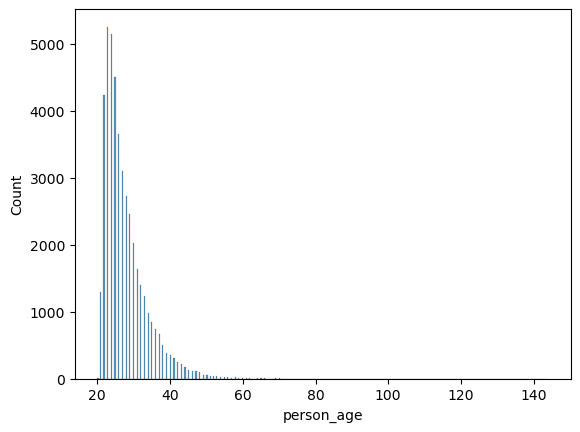

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


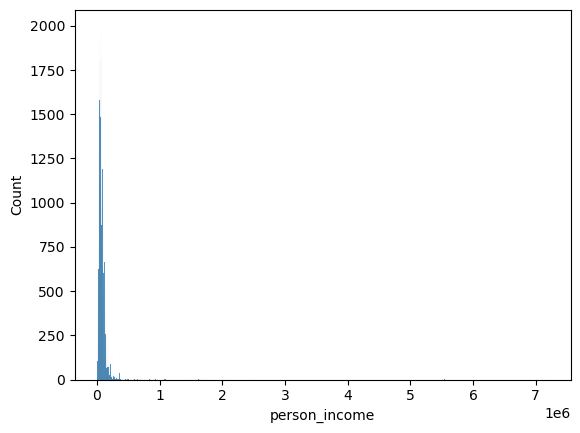

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


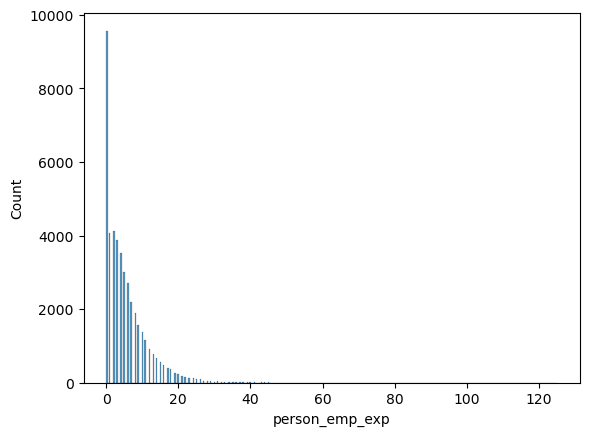

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


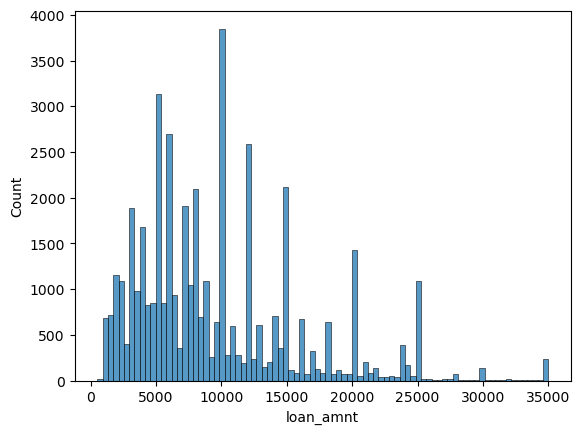

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


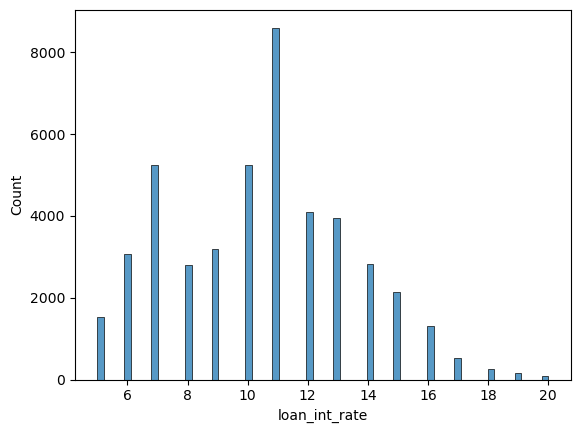

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


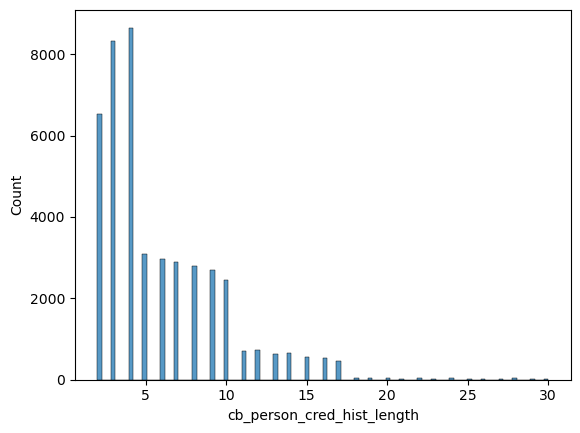

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


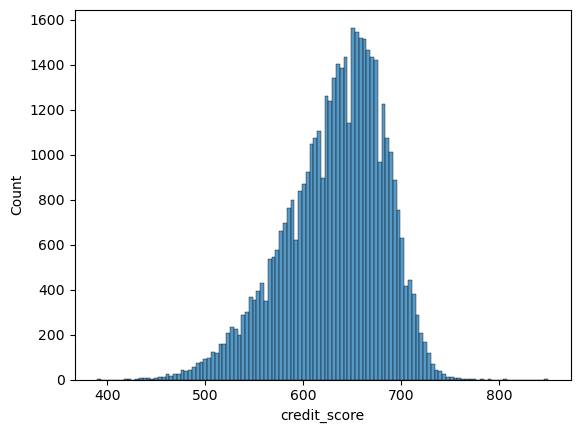

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


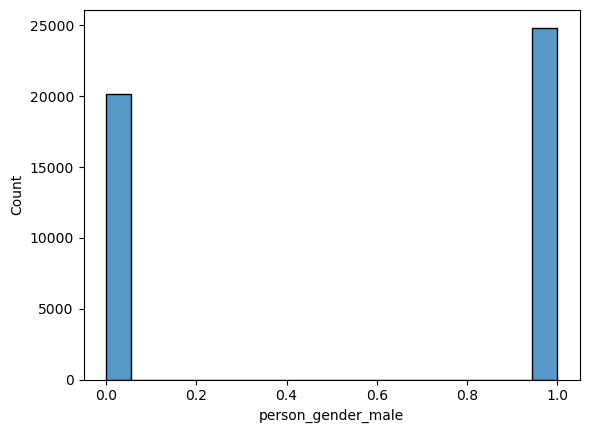

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


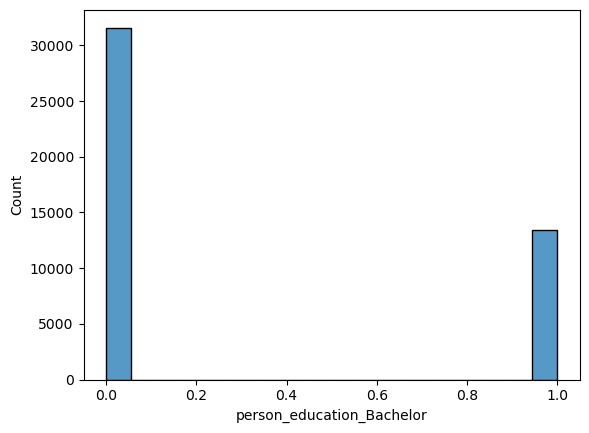

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


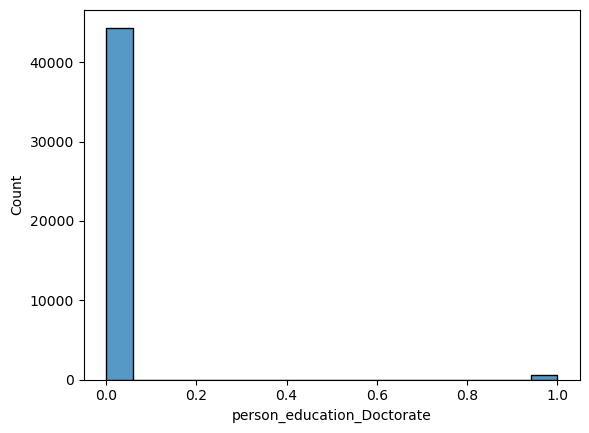

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


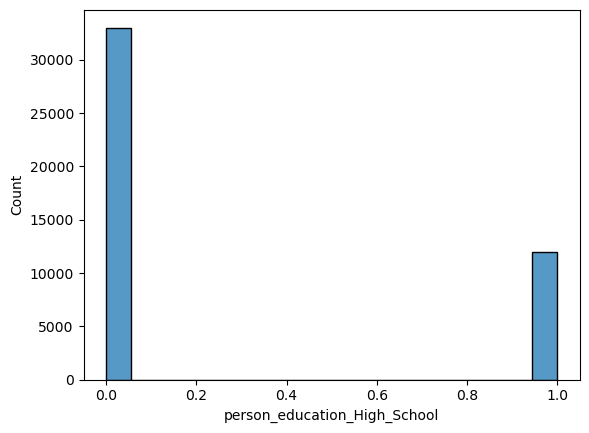

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


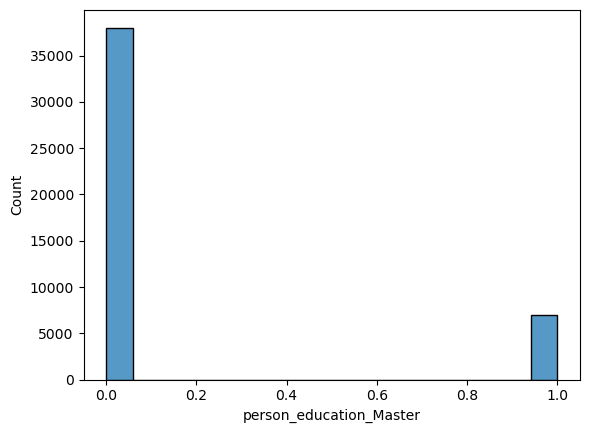

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


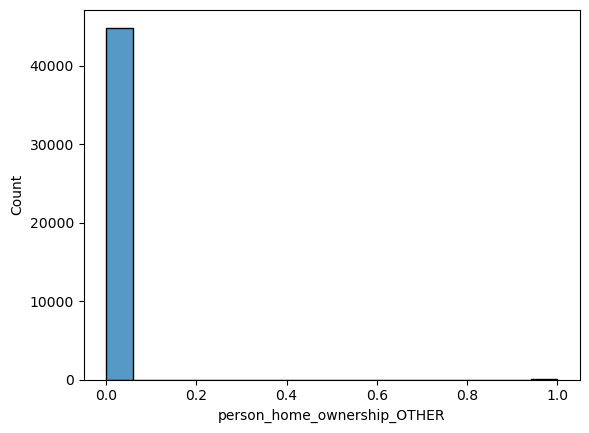

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


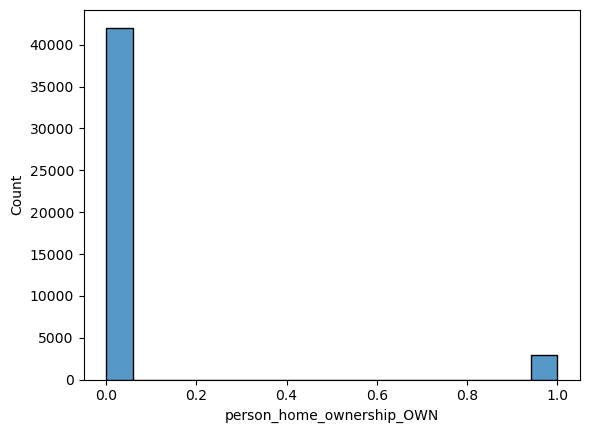

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


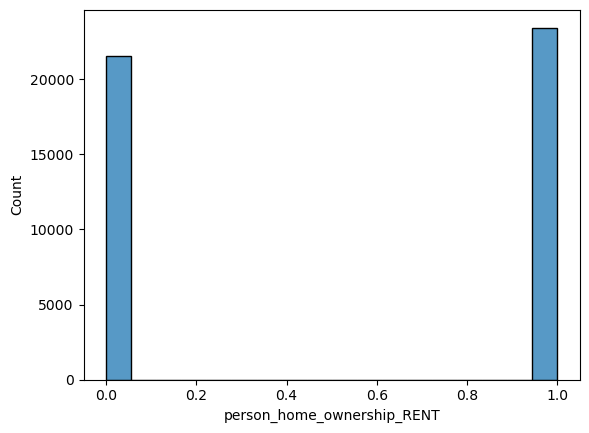

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


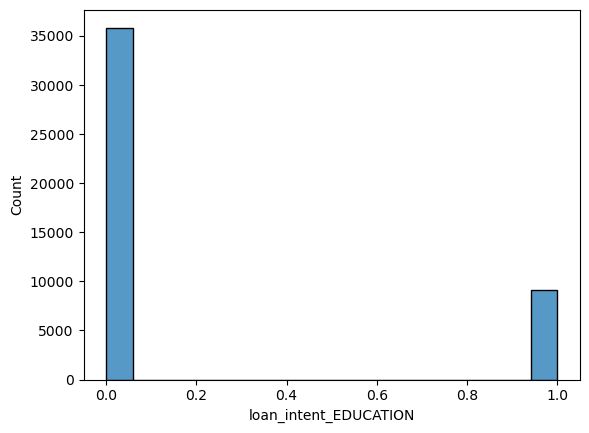

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


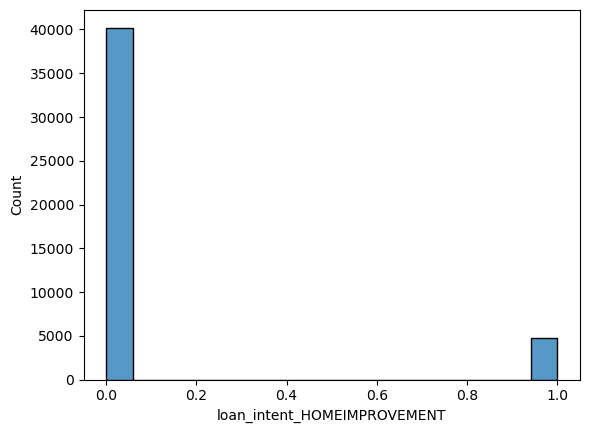

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


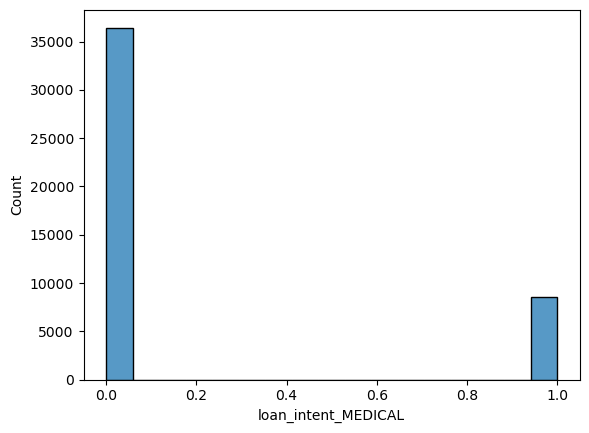

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


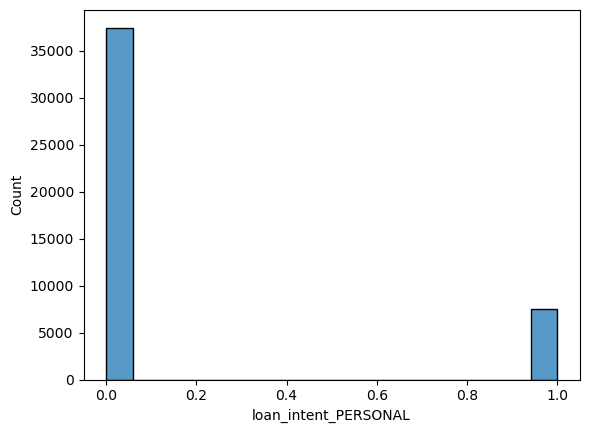

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


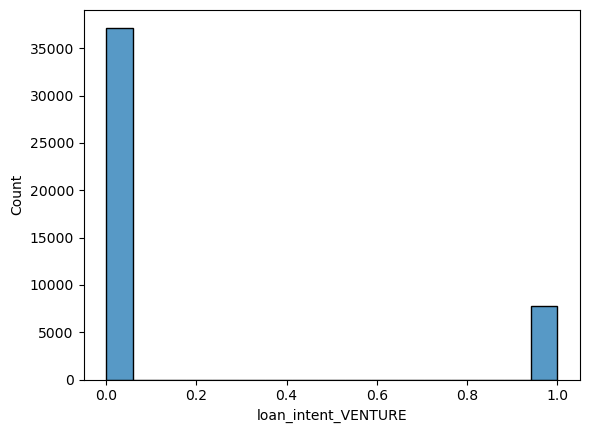

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


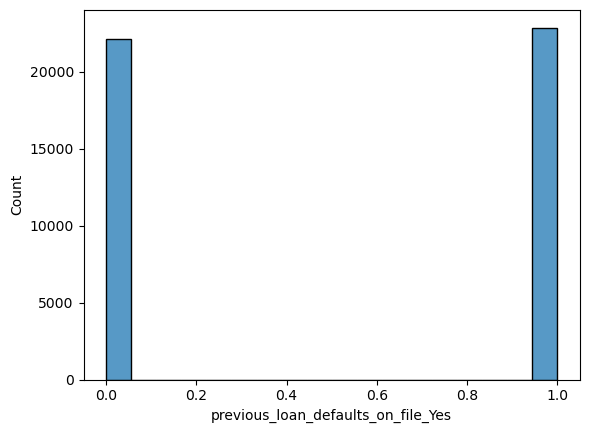

In [22]:
for col in num_cols:
    sns.histplot(X[col])
    plt.show()

#### Removing people who are more than 80 year old

In [23]:
X['person_age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67, 116, 109])

We will assume that a person who is more than 80 will not usually apply for a loan, so we will remove them so that the model will be able to generalize better

In [24]:
X.loc[X['person_age']>=80, :]

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,person_education_Doctorate,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
81,144,300616,125,4800,13,3,789,1,1,0,...,0,0,0,1,0,0,0,0,1,0
183,144,241424,121,6000,11,2,807,1,0,0,...,0,0,0,0,1,0,0,0,0,0
575,123,97140,101,20400,10,3,805,0,0,0,...,0,0,0,1,1,0,0,0,0,1
747,123,94723,100,20000,11,4,714,1,1,0,...,0,0,0,1,0,0,0,0,1,1
32297,144,7200766,124,5000,12,25,850,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32416,94,29738,76,6500,11,27,773,1,0,0,...,0,0,0,1,0,0,1,0,0,0
32422,80,77894,62,6800,11,25,673,1,0,0,...,0,0,0,1,0,0,1,0,0,0
32506,84,114705,61,10000,7,24,784,1,0,0,...,0,0,0,0,0,0,0,1,0,1
37930,116,5545545,93,3823,12,24,708,1,1,0,...,0,0,0,0,0,0,0,0,1,0
38113,109,5556399,85,6195,12,22,792,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
X = X.loc[X['person_age']<80, :]

In [26]:
X.shape

(44990, 21)

In [27]:
X.loc[X['person_emp_exp']>=64, :]

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,person_education_Doctorate,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes


We will assume that the legal age a person is allowed to work is 16. So, we will remove any person who has more than 64 years of work experience

In [29]:
X = X.loc[(X['person_emp_exp']<64) | (X['person_emp_exp'].isna()), :]

#### Deleting the corresponding y values

In [30]:
y = y[X.index]

In [31]:
categorical_cols = [col for col in X if X[col].dtypes == 'O']
categorical_cols

[]

For numerical columns, we have seen that we have 2 columns that have missing values, we are now dealing with them below by pasisng a pipeline into the column transformer.

In the pipeline, we will pass in 2 suceessive steps:

1. IterativeImputer - will impute the missing values
2. StandardScaler will scale the entire columns

For categorical columns, we don't have any missing values, we will just encode them using the OneHotEncoder.

In [32]:
numerical_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', StandardScaler()),
])

In [35]:
ct = ColumnTransformer([
    ('num_pipe', numerical_pipe, num_cols),
    ('categorical_cols', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
     categorical_cols)
], remainder='passthrough')

This code is creating a ColumnTransformer object in scikit-learn. The ColumnTransformer is a useful tool for preprocessing data in machine learning. It allows you to apply different preprocessing steps to different columns in your data, based on the type of data each column contains.

In this code, the ColumnTransformer is being created with two transformers: num_pipe and cat_cols. The num_pipe transformer is a pipeline that applies numerical preprocessing steps to the num_cols columns. The cat_cols transformer is an instance of the OneHotEncoder class, which is being used to one-hot encode the categorical columns in the data. The handle_unknown parameter is set to 'ignore', which means that any unknown categorical values that are encountered during the encoding process will be ignored.

Finally, the remainder parameter is set to 'passthrough', which means that any columns that are not specified in either the num_pipe or cat_cols transformers will be passed through to the final data without any changes.

Once the ColumnTransformer has been created, it can be used to preprocess the data by calling the fit_transform method. This method will apply the specified transformers to the data and return the preprocessed data, which can then be used for training or evaluating a machine learning model.

#### The randomized search CV
RandomizedSearchCV is a method in the scikit-learn library in Python that implements randomized search with cross-validation. It's used to find the best hyperparameters of a machine learning model by sampling from a parameter space and evaluating the model's performance using cross-validation.

Grid is a dictionary. The keys of the grid dictionary are the classifiers themselves, in this case the RandomForestClassifier, and the LGBMClassifier.

In [36]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[50,100,200],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
    
    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[50,100,200],
     'model__learning_rate':[0.001,0.01,0.1,1],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

To extract informating from the dictionary above, we use the following code

In [37]:
for clf, param in grid.items():
    print(clf)    
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [50, 100, 200], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}


LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.001, 0.01, 0.1, 1], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [38]:
full_df = pd.DataFrame()  # defining an empty dataframe
best_algos = {}    # defining an empty dictionary

for clf, param in grid.items():
    pipe = Pipeline([       # making a final pipeline
    ('coltf', ct),          # 1st step is the column transformer
    ('model', clf)          # 2nd step is the classifier
])

    randomized_search = RandomizedSearchCV(estimator=pipe, param_distributions=param,
                            scoring='accuracy', n_jobs=-1, verbose=3, n_iter=4,
                            random_state=0, error_score='raise')
    
    randomized_search.fit(X, y)    # fitting the model
    
    # this will hold all the info of the models that were built
    all_res = pd.DataFrame(randomized_search.cv_results_)  

    # taking params and mean_test_score from  all_res, saving it into temp dataframe
    temp = all_res.loc[:, ['params', 'mean_test_score']]

    # extracting the algorithm name, splitting on the ( and only taking the first part
    """
    e.g RandomForestClassifier(random_state=0, n_jobs=-1, ...

    will split at the (,
    and only take the name, i.e RandomForestClassifier
    """
    algo_name = str(clf).split('(')[0]   
    temp['algo'] = algo_name
    
    full_df = pd.concat([full_df, temp], ignore_index=True)
    best_algos[algo_name] = randomized_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 10000, number of negative: 34990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 44990, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [39]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
1,"{'model__n_estimators': 200, 'coltf__num_pipe_...",0.918315,RandomForestClassifier
0,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.918248,RandomForestClassifier
2,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.918248,RandomForestClassifier
3,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.918248,RandomForestClassifier
5,"{'model__n_estimators': 100, 'model__learning_...",0.888864,LGBMClassifier
4,"{'model__n_estimators': 50, 'model__learning_r...",0.877973,LGBMClassifier
6,"{'model__n_estimators': 50, 'model__learning_r...",0.876106,LGBMClassifier
7,"{'model__n_estimators': 200, 'model__learning_...",0.874328,LGBMClassifier


To see what are the values of the best model

In [40]:
best_mod = best_algos['RandomForestClassifier']
best_mod

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score',
                                                   'person_gender_male',
                                                   'person_educat...
                                                   'person_home_ownership_RENT',
                                                   'loan_intent_EDUCATION',
                                                   'loan_intent_HOMEIMPROVEMENT',
                                                   'loan_intent_MEDICAL',
                                                   'loan_intent_PERSONAL',
                                                   'loan_intent_VENTURE',
                                                   'previous_loan_defaults_on_file_Yes']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=0))])

Fitting on the entire data set

In [41]:
best_mod.fit(X, y)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score',
                                                   'person_gender_male',
                                                   'person_educat...
                                                   'person_home_ownership_RENT',
                                                   'loan_intent_EDUCATION',
                                                   'loan_intent_HOMEIMPROVEMENT',
                                                   'loan_intent_MEDICAL',
                                                   'loan_intent_PERSONAL',
                                                   'loan_intent_VENTURE',
                                                   'previous_loan_defaults_on_file_Yes']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=0))])

In [42]:
preds = best_mod.predict(X_test)

In [43]:
confusion_matrix(y_test, preds)

array([[7000,    0],
       [   0, 2000]], dtype=int64)

In [46]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [47]:
best_mod.score(X_test, y_test)

1.0

We have 100% accuracy

#### We can plot the precision recall curve
The higher the value is closer to 1, the better our model.

baseline is just a fraction of the positive values in the data, i.e the 1's

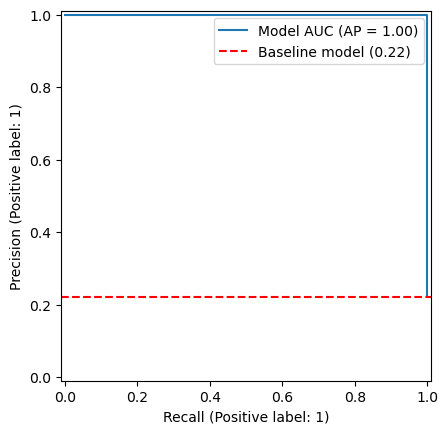

In [50]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(best_mod, X_test, y_test, name="Model AUC")
baseline = y_test.sum() / len(y_test)

plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.legend(loc='best')
plt.show()


#### The learning curve

In [51]:
a, b, c = learning_curve(best_mod, X, y, n_jobs=-1, scoring='accuracy')

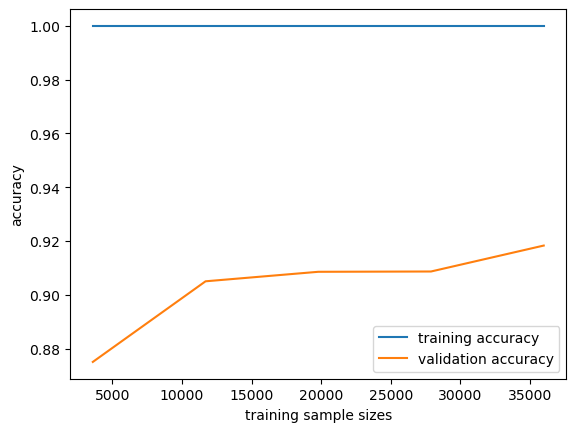

In [52]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

The learning curve suggest that the training accuracy is 100% on the training samples, while the testing/validation accuracy is **%. Although it is a good accuracy, the gap is pretty high. This indicates overfitting on the training data set.

Overfitting is when we have:

a higher training accuracy
low testing/validation accuracy(model is not able to generalize well on testing data)
big gap between the training and validation curves

#### Remedial measures:

1. Add more training samples, if possible, to allow the model to learn better. This might not always be possible. Data might be at a premium and we only have the data that we have.

2. Working with data at hand:

We can try to make a simpler model / reduce the complexity of the model by:

- try reducing number of features
- try increasing regularization (lambda)
- try pruning the decision trees

In [53]:
grid = {
    
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[50,200,400],
     'model__max_depth':[5, 9, 13],
     'model__min_samples_split':[4,6,8],
     'coltf__num_pipe__impute__estimator': [LinearRegression(),
                                        RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

In [54]:
full_df = pd.DataFrame()
best_algos = {}

for clf, param in grid.items():
    pipe = Pipeline([
    ('coltf', ct),
    ('model', clf)
])

    gs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy',
                            n_jobs=-1, verbose=3, n_iter=4)
    
    gs.fit(X, y)
    
    all_res = pd.DataFrame(gs.cv_results_)

    temp = all_res.loc[:, ['params', 'mean_test_score']]
    algo_name = str(clf).split('(')[0]
    temp['algo'] = algo_name
    
    full_df = pd.concat([full_df, temp])
    best_algos[algo_name] = gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [55]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
2,"{'model__n_estimators': 200, 'model__min_sampl...",0.865570,RandomForestClassifier
1,"{'model__n_estimators': 400, 'model__min_sampl...",0.864614,RandomForestClassifier
3,"{'model__n_estimators': 50, 'model__min_sample...",0.850278,RandomForestClassifier
0,"{'model__n_estimators': 200, 'model__min_sampl...",0.834719,RandomForestClassifier


In [56]:
best2 = best_algos['RandomForestClassifier']
best2

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score',
                                                   'person_gender_male',
                                                   'person_educat...
                                                   'loan_intent_HOMEIMPROVEMENT',
                                                   'loan_intent_MEDICAL',
                                                   'loan_intent_PERSONAL',
                                                   'loan_intent_VENTURE',
                                                   'previous_loan_defaults_on_file_Yes']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=9,
                                        min_samples_split=8, n_estimators=200,
                                        n_jobs=-1, random_state=0))])

In [57]:
best2.fit(X, y)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score',
                                                   'person_gender_male',
                                                   'person_educat...
                                                   'loan_intent_HOMEIMPROVEMENT',
                                                   'loan_intent_MEDICAL',
                                                   'loan_intent_PERSONAL',
                                                   'loan_intent_VENTURE',
                                                   'previous_loan_defaults_on_file_Yes']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=9,
                                        min_samples_split=8, n_estimators=200,
                                        n_jobs=-1, random_state=0))])

In [58]:
preds = best2.predict(X_test)

In [59]:
confusion_matrix(y_test, preds)

array([[5977, 1023],
       [ 121, 1879]], dtype=int64)

In [60]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7000
           1       0.65      0.94      0.77      2000

    accuracy                           0.87      9000
   macro avg       0.81      0.90      0.84      9000
weighted avg       0.91      0.87      0.88      9000



In [61]:
best2.score(X_test, y_test)

0.8728888888888889

The best model gave 87.29% accuracy.

In [65]:
a, b, c = learning_curve(best2, X, y, n_jobs=-1, cv=5)

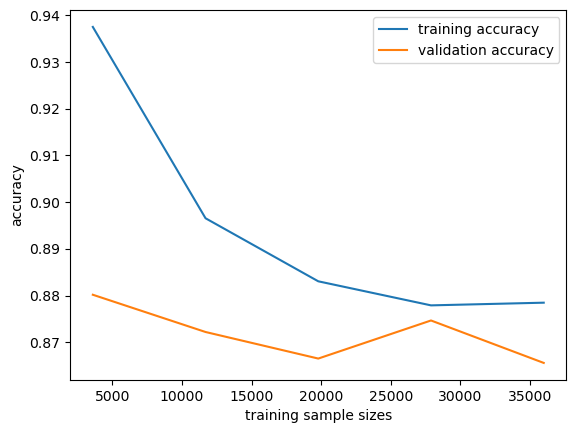

In [66]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

- The model overfits (learns too much from training data and struggles with new data).
- Adding more data helps at first, but after a certain point, it doesn’t improve much.
- To fix this, we might need to tune the model, use better features, or apply regularization